#TC1002s - CS Tool - Mastering Analytics
#Activity 3 - Patterns with K-means
##Noel Sebastian Marquez Tovar - A01659730
##Angel Guillermo Bosquez Baltazar - A01667100


To use this file simply drag the Video_Games.csv incldued in Github to the Archivos(Files) Section

In [ ]:

##Step 1: we load and prepare our dataset

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Video_Games.csv")
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')

In [ ]:
##Step 2: We select relevant variables for our analysis and clean them of empty values
variables = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "User_Score"]
df_cluster = df[variables].dropna()

## We also scale our data so they have the same influence when we calculate the distance in k-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

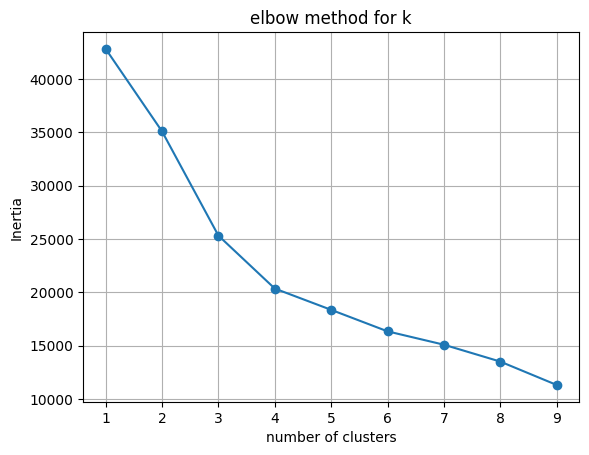

In [ ]:
#Step 3: We use the elbow method to determine our K value

#We added inertia to evaluate how well the K-means algorithm fits the data for different values of k

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("elbow method for k")
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: From the graphic representation we decided to use 4 as our K-means value
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df_cluster["Cluster"] = kmeans.labels_

#then we get the centroids and re-scale them to  their original size
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids, columns=variables)
print("Centroides de cada cluster:")
print(centroid_df)

Centroides de cada cluster:
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  User_Score
0   0.174522  0.093377  0.013212     0.032496     54.457729    5.546773
1   0.321668  0.171577  0.045906     0.058763     75.964131    7.823006
2  11.971429  8.996429  3.371429     3.839286     82.714286    8.014286
3   2.700333  1.991000  0.582481     0.677481     85.314815    7.745185


In [ ]:
# Step 5: Add game names to df_cluster so we can inspect which titles belong to each cluster
df_cluster["Name"] = df.loc[df_cluster.index, "Name"]

# For each cluster label from 0 up to k-1…
for i in range(k):
    print(f"\nCluster {i} examples:")
    # 1) Filter df_cluster to only the rows assigned to cluster i
    # 2) Select the columns we care about (Name and key metrics)
    # 3) Use .head() to show just the first 5 entries for a quick sanity check
    examples = df_cluster[
        df_cluster["Cluster"] == i
    ][["Name", "Critic_Score", "User_Score", "NA_Sales"]].head()
    print(examples)



Cluster 0 examples:
                        Name  Critic_Score  User_Score  NA_Sales
294           Carnival Games          56.0         6.0      2.12
373  Assassin's Creed: Unity          72.0         4.1      2.27
418                Wii Music          63.0         4.6      1.35
458               The Sims 4          70.0         3.9      1.00
493     Call of Duty: Ghosts          78.0         4.3      1.88

Cluster 1 examples:
                                            Name  Critic_Score  User_Score  \
238                              Madden NFL 2005          91.0         7.9   
266                                 Namco Museum          79.0         7.3   
284                                    Half-Life          96.0         9.1   
288       World of Warcraft: The Burning Crusade          91.0         7.9   
329  LEGO Indiana Jones: The Original Adventures          77.0         7.5   

     NA_Sales  
238      4.18  
266      3.00  
284      4.03  
288      2.57  
329      2.40  

Cl

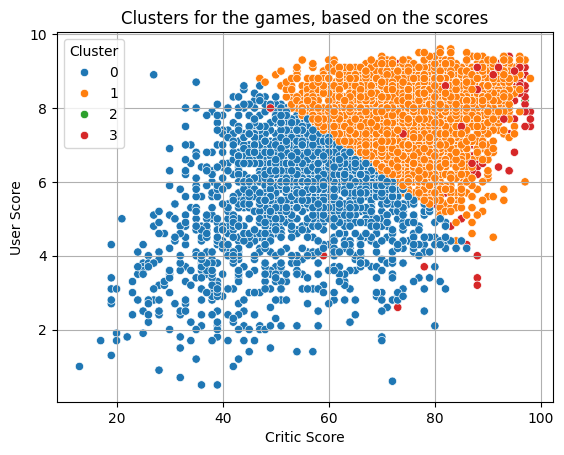

In [ ]:
## Step 6 plot critic vs user scores colored by cluster to visualize the 2D grouping of games
sns.scatterplot(
    data=df_cluster,
    x="Critic_Score",
    y="User_Score",
    hue="Cluster",
    palette="tab10"
)


plt.title("Clusters for the games, based on the scores")
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.grid(True)
plt.show()


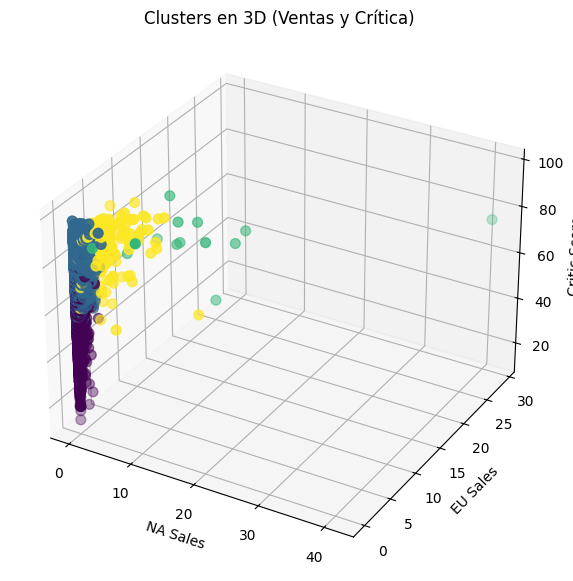

In [ ]:
##Step 7 visualasion of the clusters3D
# We create the figure and then we add the projection in 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#  We define the axes and then we make the color points for each cluster
ax.scatter(
    df_cluster["NA_Sales"],
    df_cluster["EU_Sales"],
    df_cluster["Critic_Score"],
    c=df_cluster["Cluster"],
    cmap='viridis',
    s=50
)

# Put the name for the axes
ax.set_xlabel("NA Sales")
ax.set_ylabel("EU Sales")
ax.set_zlabel("Critic Score")

plt.title("Clusters en 3D (Ventas y Crítica)")
plt.show()



#in purple cluster 0
#in blue cluster 1
#in green, cluster 2
#in yellow cluster 3

#Questions after analysis
##Do you think these centers might be representative of the data? Why?  
Yes, because the centroids and cluster reveal different patterns of videogame performance

##How did you obtain the k value to use?
We used the elbow method, where we plotted different k-values, around 4 the decrease speed slowed significantly

##Would the centers be more representative if you used a higher value? A lower value?
If we used a higher value it would probably increase the precision of the model but we'll lose some pattenr
At lower values, it might create pattern that miss some details

##How far apart are the centers? Are any very close to others?
The separation between mainstream and high scored games is well represented

Cluster 0 and 2 are closer together, reresenting games with moderate critic and user scores and low to medium sales numbers.

Clusters 2 and 3 represent games with higher review scores or sales numbers and are more spaced out between each other,


##What would happen to the centers if we had many outliers in the box-and-whisker analysis?
Outliers would pull the centroids away from the core of the data, distorting the average positions, in this industry is not rare to hear about games with sales on the tens of millions

That's why scaling was very important, it balances the impact of these outliers

##What can you say about the data based on the centers?
The data reveals the four categories we wanted to focus on

Cluster 0: low sales and average reviews. Niche or less sucessful games, usally directed to an specific audience

Cluster 1: better sales and higher reviews. But still in the moderate cateogry

Cluster 2: Very high sales and high reviews. Very popular games that are also perceived as being quality products.

Cluster 3: High review scores but medium sales. Possibly games that are well liked by the criticsbut not considered as best sellers



Answers Seb Marquez A01659730

Do you think these centers might be representative of the data? Why?

Yes, the centroids provide meaningful summaries of the clusters—they reflect distinct patterns in game performance across regions and review scores.

How did you obtain the k value to use?

We applied the elbow method by plotting the inertia values for various k. Around k = 4, the rate of decrease in inertia noticeably slowed, indicating a good balance.

Would the centers be more representative if you used a higher value? A lower value?

Using more clusters could improve detail and granularity but might lead to overfitting or fragmented patterns. Fewer clusters might oversimplify the data and hide important distinctions.

How far apart are the centers? Are any very close to others?

The distance between some clusters suggests clear separation in game profiles. For instance, Clusters 0 and 2 seem more similar—games with moderate scores and mid-level sales. Clusters 2 and 3 are more distinct, capturing games with high success either in reviews or sales.

What would happen to the centers if we had many outliers in the box-and-whisker analysis?

Outliers could shift the centroids away from the core data, especially in sales where a few titles dominate. This distortion is why scaling was essential—it helps neutralize extreme values and maintains the relative structure.

What can you say about the data based on the centers?

The clusters reflect four clear groups in the industry:

Cluster 0: Low sales and average reviews—likely niche or underperforming titles.

Cluster 1: Decent sales and reviews—solid but not standout games.

Cluster 2: High sales and strong reviews—popular, well-received hits.

Cluster 3: Strong critic scores but modest sales—possibly critically acclaimed games with limited commercial reach.